# Exercice 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 


def Fgenfij(n,Txt,L=1,mu=0.5,sigma=0.1):
    fij=np.zeros(n)
    if Txt=="Tri":
        fij=np.linspace(0, L,n)
        for j in range(0,n):
            if fij[j]>L/2:
                fij[j]=L-fij[j]
    if Txt=="Sin":
        fij=np.linspace(0,2*3.14,n)
        fij=np.sin(fij)
    if Txt=="Lin":
        fij=np.linspace(0, 1,n)
        fij[-1]=0
        return fij
    if Txt=="Gauss":
        fij=np.linspace(0, L,n)
        fij = stats.norm.pdf(fij, mu, sigma) 
        print(fij)
        """
        fij=np.linspace(0,1,n)
        fij=(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-((fij-2.5)/sigma)**2*1/2)
        """
    return fij


r=0.4
n=20 #size of matrix
xmax=1
#𝑓(0, 𝑥) = 1 − |2𝑥 − 1|
Niter=20

M=np.diag((r)*np.ones(n-1),-1)+np.diag((1-2*r)*np.ones(n))+np.diag((r)*np.ones(n-1),1)
#M=np.diag((1-2*r)*np.ones(30))+np.diag(r*np.ones(30),-1)+np.diag(r*np.ones(30),1)
print(M)
ft=np.linspace(0, 1,n) #améliorer, avec matrice auto


fij=Fgenfij(n,"Tri")
ft=fij
print(fij,"wtf")

fi0N=np.zeros(fij.size)
fi0N[n-1]=1-abs(2*xmax-1)
print(ft)
plt.plot(fij)

for i in range(1,Niter):
    fij=M@fij.T+r*fi0N.T
    fij[0]=ft[0]
    fij[n-1]=ft[-1]

    plt.plot(fij)



    #plt.plot(fij)
plt.show()

# Exercice 2

In [ ]:
r=0.5

n=12 #size of matrix
#𝑓(0, 𝑥) = 1 − |2𝑥 − 1|
Niter=2
xmax=1



theta=1

fij=Fgenfij(n,"Tri")
ft=np.linspace(0, 1,n) #améliorer, avec matrice auto
Am=np.diag((-theta*r)*np.ones(n-1),-1)+np.diag((1+2*theta*r)*np.ones(n))+np.diag((-theta*r)*np.ones(n-1),1)
Bm=np.diag(((1-theta)*r)*np.ones(n-1),-1)+np.diag((1+2*r*(theta-1))*np.ones(n))+np.diag(((1-theta)*r)*np.ones(n-1),1)

fi0N=np.zeros(fij.size)
fi0N[n-1]=1-abs(2*xmax-1)
ft=fij


plt.plot(fij)
for i in range(1,Niter):
    fij=np.linalg.inv(Am)@fij@Bm
    fij[0]=ft[0]
    fij[-1]=ft[-1]

    plt.plot(fij)



    #plt.plot(fij)
plt.show()



#F1 = F0
#en gros pour indice 1, plt.plot
#                       puis continue

[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 7.65392974e-135 3.98942280e+001 7.65392974e-135
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000]


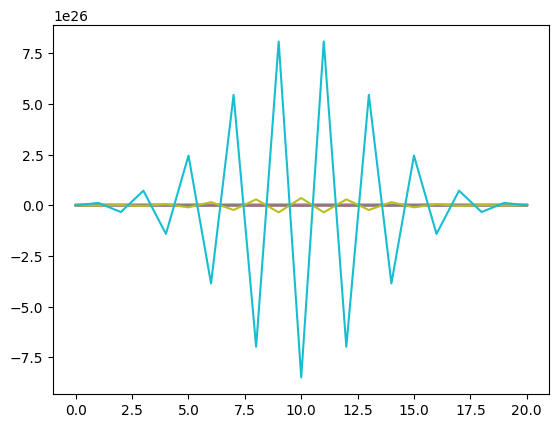

In [166]:

L=5
tmax=10
n=100

tau=0.05
h=0.02
c=1
r=(c*tau/h)**2

n=21 #size of matrix
xmax=1
#𝑓(0, 𝑥) = 1 − |2𝑥 − 1|
Niter=20


M=np.diag((r)*np.ones(n-1),-1)+np.diag((1-2*r)*np.ones(n))+np.diag((r)*np.ones(n-1),1)

F=[[0]]

fij=Fgenfij(n,"Gauss",L=5,mu=2.5,sigma=0.01)
ft=fij
fijm1=fij
fijm1temp=fij

F.append(fijm1)
F.append(fij)


plt.plot(fij)

for i in range(1,Niter):
    fijm1temp=fij #récup du fij
    fij=M@fij-fijm1 # fij+1 = M*fij - fij-1
    fij[0]=ft[0]
    fij[-1]=ft[-1] #condition aux bords
    F.append(fij)


    plt.plot(fij)
    fijm1=fijm1temp #application du fij courant sur fijm1 pour prochaine itération



    #plt.plot(fij)
plt.show()

#normal que la figure soit étrange, montrer animation pour comprendre vraiment


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Paramètres de la figure
fig, ax = plt.subplots()
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
line, = ax.plot(x, y)

# Fonction d'initialisation
def init():
    line.set_ydata(np.sin(x))
    return line,

# Fonction de mise à jour
def update(frame):
    y = np.sin(x + frame * 0.1)  # Déplace la sinusoïde vers la droite
    line.set_ydata(y)
    return line,

# Création de l'animation
ani = FuncAnimation(
    fig, update, frames=np.arange(0, 100, 1), init_func=init, blit=True, interval=50
)

# Sauvegarde de l'animation en MP4
filename="./sinusoidal_animation"
writer = FFMpegWriter(fps=24, codec='libx264', extra_args=['-pix_fmt', 'yuv420p'])
#ani.save(f"{filename}.mp4", writer=writer, dpi=200)
#ani.save("sinusoidal_animation.mp4", writer=writer, dpi=200)

ani.save(f"{filename}.mp4", writer=FFMpegWriter(fps=24, codec='libx264', extra_args=['-pix_fmt', 'yuv420p']), dpi=200)

# Affichage de l'animation
plt.show()


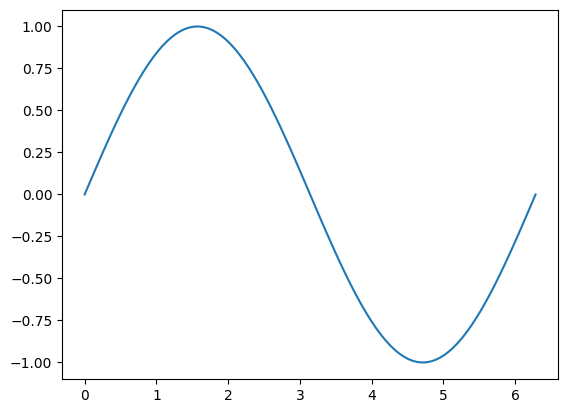

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Paramètres de la figure
fig, ax = plt.subplots()
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)
line, = ax.plot(x, y)

# Fonction d'initialisation
def init():
    line.set_ydata(np.sin(x))
    return line,

# Fonction de mise à jour
def update(frame):
    y = np.sin(x + frame * 0.1)  # Déplace la sinusoïde vers la droite
    line.set_ydata(y)
    return line,

# Création de l'animation
ani = FuncAnimation(
    fig, update, frames=np.arange(0, 100, 1), init_func=init, blit=True, interval=50
)

# Sauvegarde de l'animation en MP4
filename="sinusoidal_animation"
writer = FFMpegWriter(fps=24, codec='libx264', extra_args=['-pix_fmt', 'yuv420p'])
#ani.save(f"{filename}.mp4", writer=writer, dpi=200)
#ani.save("sinusoidal_animation.mp4", writer=writer, dpi=200)

#ani.save(f"{filename}.mp4", writer=FFMpegWriter(fps=24, codec='libx264', extra_args=['-pix_fmt', 'yuv420p']), dpi=200)

# Affichage de l'animation
plt.show()